In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
file_path = '/content/Amazon Sales data.csv'
data = pd.read_csv(file_path)

In [4]:
# Convert dates to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], errors='coerce')

In [5]:
# Basic data overview
print("Data Overview:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    object        
 3   Sales Channel   100 non-null    object        
 4   Order Priority  100 non-null    object        
 5   Order Date      66 non-null     datetime64[ns]
 6   Order ID        100 non-null    int64         
 7   Ship Date       64 non-null     datetime64[ns]
 8   Units Sold      100 non-null    int64         
 9   Unit Price      100 non-null    float64       
 10  Unit Cost       100 non-null    float64       
 11  Total Revenue   100 non-null    float64       
 12  Total Cost      100 non-null    float64       
 13  Total Profit    100 non-null    float64       
dtypes: datetime64[ns](2), float64(5), int64(2), 

In [6]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Region             0
Country            0
Item Type          0
Sales Channel      0
Order Priority     0
Order Date        34
Order ID           0
Ship Date         36
Units Sold         0
Unit Price         0
Unit Cost          0
Total Revenue      0
Total Cost         0
Total Profit       0
dtype: int64


In [7]:
# Total revenue, cost, and profit by region
region_performance = data.groupby('Region')[['Total Revenue', 'Total Cost', 'Total Profit']].sum()
print("\nRegion Performance:")
print(region_performance)


Region Performance:
                                   Total Revenue   Total Cost  Total Profit
Region                                                                     
Asia                                 21347091.02  15233245.15    6113845.87
Australia and Oceania                14094265.13   9372105.10    4722160.03
Central America and the Caribbean     9170385.49   6323477.64    2846907.85
Europe                               33368932.11  22285993.48   11082938.63
Middle East and North Africa         14052706.58   8291514.72    5761191.86
North America                         5643356.55   4185413.79    1457942.76
Sub-Saharan Africa                   39672031.43  27488820.03   12183211.40


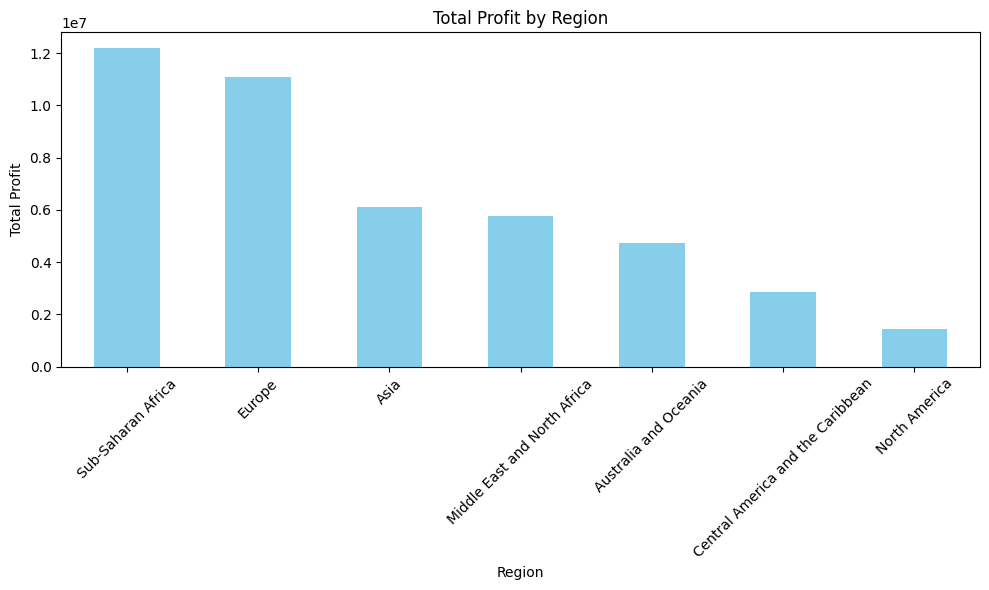

In [8]:
# Visualize total profit by region
plt.figure(figsize=(10, 6))
region_performance['Total Profit'].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Total Profit by Region')
plt.ylabel('Total Profit')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:

# Total revenue by product category
product_performance = data.groupby('Item Type')[['Total Revenue', 'Total Profit']].sum()
print("\nProduct Performance:")
print(product_performance)


Product Performance:
                 Total Revenue  Total Profit
Item Type                                   
Baby Food          10350327.60    3886643.70
Beverages           2690794.60     888047.28
Cereal              5322898.90    2292443.43
Clothes             7787292.80    5233334.40
Cosmetics          36601509.60   14556048.66
Fruits               466481.34     120495.18
Household          29889712.29    7412605.71
Meat                4503675.75     610610.00
Office Supplies    30585380.07    5929583.75
Personal Care       3980904.84    1220622.48
Snacks              2080733.46     751944.18
Vegetables          3089057.06    1265819.63


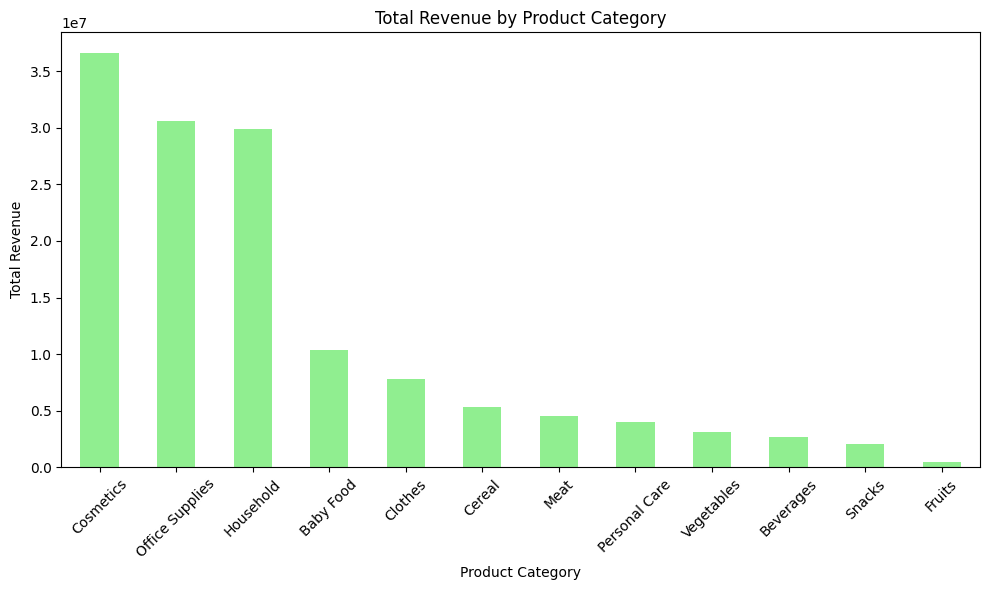

In [10]:
# Visualize total revenue by product category
plt.figure(figsize=(10, 6))
product_performance['Total Revenue'].sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('Total Revenue by Product Category')
plt.ylabel('Total Revenue')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

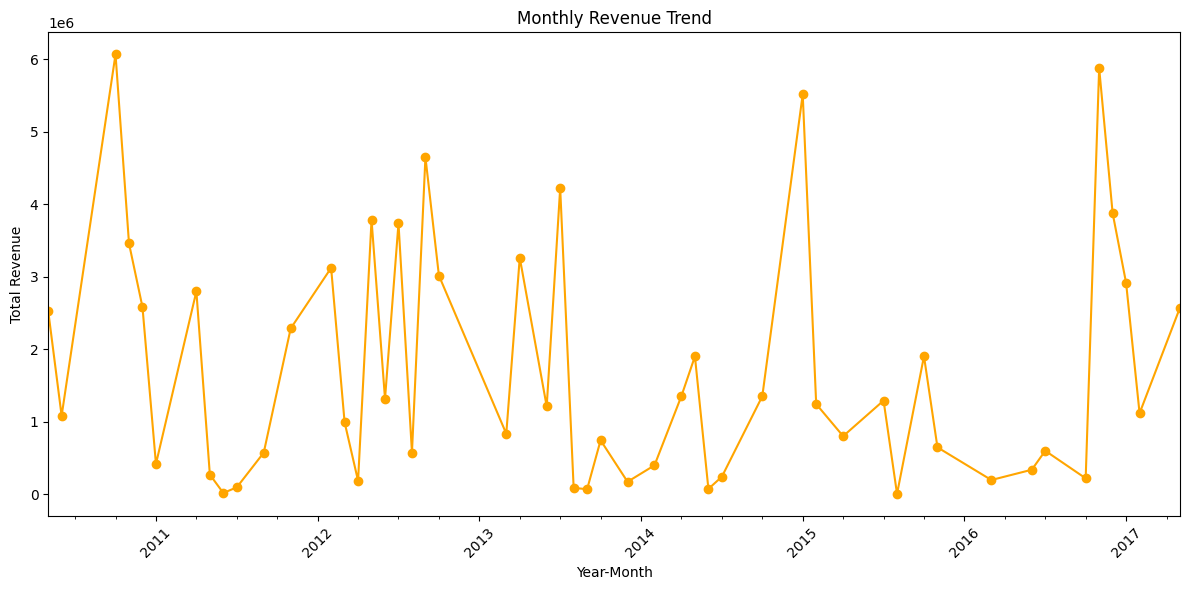

In [11]:
# Trend analysis: Revenue over time
data['Year-Month'] = data['Order Date'].dt.to_period('M')
monthly_revenue = data.groupby('Year-Month')['Total Revenue'].sum()

plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o', color='orange')
plt.title('Monthly Revenue Trend')
plt.ylabel('Total Revenue')
plt.xlabel('Year-Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-12-bdadae0870f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Order Priority', palette='viridis', order=data['Order Priority'].value_counts().index)


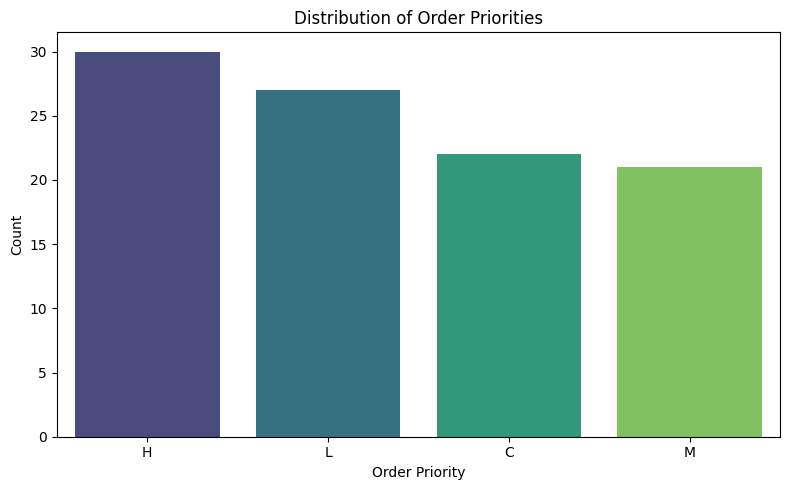

In [12]:
# Distribution of order priorities
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Order Priority', palette='viridis', order=data['Order Priority'].value_counts().index)
plt.title('Distribution of Order Priorities')
plt.ylabel('Count')
plt.xlabel('Order Priority')
plt.tight_layout()
plt.show()


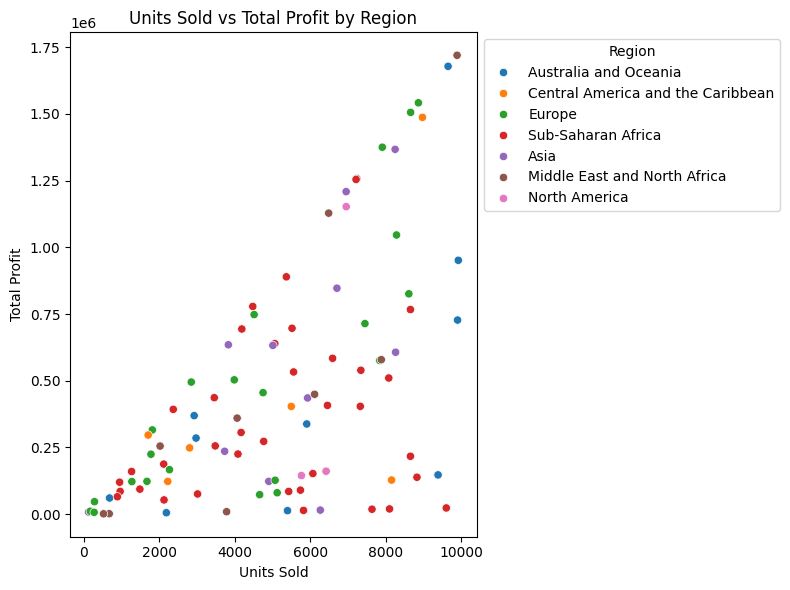

In [13]:
# Correlation between units sold and total profit
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Units Sold', y='Total Profit', hue='Region', palette='tab10')
plt.title('Units Sold vs Total Profit by Region')
plt.ylabel('Total Profit')
plt.xlabel('Units Sold')
plt.legend(title='Region', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()
